# Purpose of notebook: preprocess the data
Includes dropping un-needed cols, translated boolean cols to 0 and 1, one-hot encoding for categorical attributes, some feature engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [2]:
import pandas as pd

# Read the CSV files into separate DataFrames
df1 = pd.read_csv('pro2_data_abilities.csv')
df2 = pd.read_csv('pro1_data_abilities.csv')
# df3 = pd.read_csv('dev_data_abilities.csv')

# Concatenate the DataFrames vertically
df = pd.concat([df1, df2], ignore_index=True)

df

,user_id,map,player,ally3_character,ally4_character,self_character,ally1_character,ally2_character,opponent5_character,opponent6_character,...,pre_spike_information_used,post_spike_information_used,pre_spike_healing_used,post_spike_healing_used,pre_spike_damage_for_team_used,post_spike_damage_for_team_used,pre_spike_crowd_control_mobility_used,post_spike_crowd_control_mobility_used,pre_spike_crowd_control_vision_used,post_spike_crowd_control_vision_used
0,3807,Pearl,2,gekko,viper,phoenix,astra,jett,harbor,killjoy,...,0,0,0,0,0,0,0,0,4,0
1,3807,Pearl,2,gekko,viper,phoenix,astra,jett,harbor,killjoy,...,0,0,0,0,0,0,0,0,2,0
2,3807,Pearl,2,gekko,viper,phoenix,astra,jett,harbor,killjoy,...,0,0,0,0,0,0,0,0,0,0
3,3807,Pearl,2,gekko,viper,phoenix,astra,jett,harbor,killjoy,...,0,0,0,0,1,0,0,0,0,2
4,3807,Pearl,2,gekko,viper,phoenix,astra,jett,harbor,killjoy,...,0,0,1,0,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20909,61,Icebox,1,viper,harbor,cypher,reyna,sage,sage,astra,...,1,1,0,0,0,0,1,0,1,1
20910,61,Icebox,1,viper,harbor,cypher,reyna,sage,sage,astra,...,2,0,0,0,0,0,1,0,2,0
20911,61,Icebox,1,viper,harbor,cypher,reyna,sage,sage,astra,...,1,1,0,0,0,0,2,0,1,1
20912,61,Icebox,1,viper,harbor,cypher,reyna,sage,sage,astra,...,2,0,0,0,0,0,1,0,2,0


In [3]:
# Find rows with NaN values
nan_rows = df[df.isnull().any(axis=1)]

# Print the rows with NaN values
nan_rows

,user_id,map,player,ally3_character,ally4_character,self_character,ally1_character,ally2_character,opponent5_character,opponent6_character,...,pre_spike_information_used,post_spike_information_used,pre_spike_healing_used,post_spike_healing_used,pre_spike_damage_for_team_used,post_spike_damage_for_team_used,pre_spike_crowd_control_mobility_used,post_spike_crowd_control_mobility_used,pre_spike_crowd_control_vision_used,post_spike_crowd_control_vision_used


In [4]:
df.columns[:100]

Index(['user_id', 'map', 'player', 'ally3_character', 'ally4_character',
       'self_character', 'ally1_character', 'ally2_character',
       'opponent5_character', 'opponent6_character', 'opponent7_character',
       'opponent8_character', 'opponent9_character', 'spike_planted',
       'spike_time', 'round_number', 'round_info_ally_side',
       'round_info_round_end', 'round_info_round_won',
       'round_info_round_start', 'ally3_pre_spike_elims',
       'ally3_post_spike_elims', 'ally3_pre_spike_deaths',
       'ally3_post_spike_deaths', 'ally3_pre_spike_assists',
       'ally3_post_spike_assists', 'ally3_pre_spike_headshots',
       'ally3_post_spike_headshots', 'ally3_pre_spike_wallbangs',
       'ally3_post_spike_wallbangs', 'ally3_pre_spike_first_bloods',
       'ally3_post_spike_first_bloods', 'ally4_pre_spike_elims',
       'ally4_post_spike_elims', 'ally4_pre_spike_deaths',
       'ally4_post_spike_deaths', 'ally4_pre_spike_assists',
       'ally4_post_spike_assists', 'ally

In [5]:
df.columns[100:200]

Index(['opponent1_pre_spike_wallbangs', 'opponent1_post_spike_wallbangs',
       'opponent1_pre_spike_first_bloods', 'opponent1_post_spike_first_bloods',
       'opponent2_pre_spike_elims', 'opponent2_post_spike_elims',
       'opponent2_pre_spike_deaths', 'opponent2_post_spike_deaths',
       'opponent2_pre_spike_assists', 'opponent2_post_spike_assists',
       'opponent2_pre_spike_headshots', 'opponent2_post_spike_headshots',
       'opponent2_pre_spike_wallbangs', 'opponent2_post_spike_wallbangs',
       'opponent2_pre_spike_first_bloods', 'opponent2_post_spike_first_bloods',
       'opponent3_pre_spike_elims', 'opponent3_post_spike_elims',
       'opponent3_pre_spike_deaths', 'opponent3_post_spike_deaths',
       'opponent3_pre_spike_assists', 'opponent3_post_spike_assists',
       'opponent3_pre_spike_headshots', 'opponent3_post_spike_headshots',
       'opponent3_pre_spike_wallbangs', 'opponent3_post_spike_wallbangs',
       'opponent3_pre_spike_first_bloods', 'opponent3_post_spi

In [6]:
df.columns[200:]

Index(['self_pre_spike_ultimate_usage', 'self_post_spike_ultimate_usage',
       'ally1_ultimate_usage', 'ally1_pre_spike_ultimate_usage',
       'ally1_post_spike_ultimate_usage', 'ally2_ultimate_usage',
       'ally2_pre_spike_ultimate_usage', 'ally2_post_spike_ultimate_usage',
       'opponent0_ultimate_usage', 'opponent0_pre_spike_ultimate_usage',
       'opponent0_post_spike_ultimate_usage', 'opponent1_ultimate_usage',
       'opponent1_pre_spike_ultimate_usage',
       'opponent1_post_spike_ultimate_usage', 'opponent2_ultimate_usage',
       'opponent2_pre_spike_ultimate_usage',
       'opponent2_post_spike_ultimate_usage', 'opponent3_ultimate_usage',
       'opponent3_pre_spike_ultimate_usage',
       'opponent3_post_spike_ultimate_usage', 'opponent4_ultimate_usage',
       'opponent4_pre_spike_ultimate_usage',
       'opponent4_post_spike_ultimate_usage', 'self_pre_spike_map_covered',
       'self_pre_spike_movement_metric', 'self_post_spike_map_covered',
       'self_post_spik

In [7]:
df.iloc[0][:50]

user_id                              3807
map                                 Pearl
player                                  2
ally3_character                     gekko
ally4_character                     viper
self_character                    phoenix
ally1_character                     astra
ally2_character                      jett
opponent5_character                harbor
opponent6_character               killjoy
opponent7_character                  jett
opponent8_character                 astra
opponent9_character                  yoru
spike_planted                       False
spike_time                              0
round_number                            0
round_info_ally_side             defender
round_info_round_end               178579
round_info_round_won                False
round_info_round_start             134795
ally3_pre_spike_elims                   0
ally3_post_spike_elims                  0
ally3_pre_spike_deaths                  1
ally3_post_spike_deaths           

In [8]:
df.iloc[0][50:]

self_pre_spike_headshots                  0
self_post_spike_headshots                 0
self_pre_spike_wallbangs                  0
self_post_spike_wallbangs                 0
self_pre_spike_first_bloods               0
                                         ..
post_spike_damage_for_team_used           0
pre_spike_crowd_control_mobility_used     0
post_spike_crowd_control_mobility_used    0
pre_spike_crowd_control_vision_used       4
post_spike_crowd_control_vision_used      0
Name: 0, Length: 222, dtype: object

## Data pre-processing
- Dropped 2 cols I don't need
- Checked to see if there are NaNs and 'unknowns'
- Because map wasn't really seeming to be a major influence on W/L ratio I am leaving the unknowns in
- However attacker vs defender could probably be an issue...


- Translated the boolean cols to 0 and 1
- One-hot encode categorical variables
- StandardScaler for numeric ...

In [9]:
df = df.drop(['player','round_number'], axis=1)

### encoding boolean features


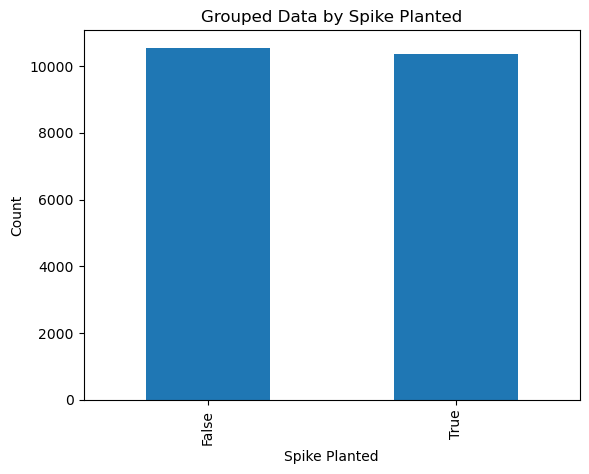

In [10]:
grouped_df = df.groupby('spike_planted').size()

grouped_df.plot(kind='bar')

plt.xlabel('Spike Planted')
plt.ylabel('Count')
plt.title('Grouped Data by Spike Planted')

plt.show()

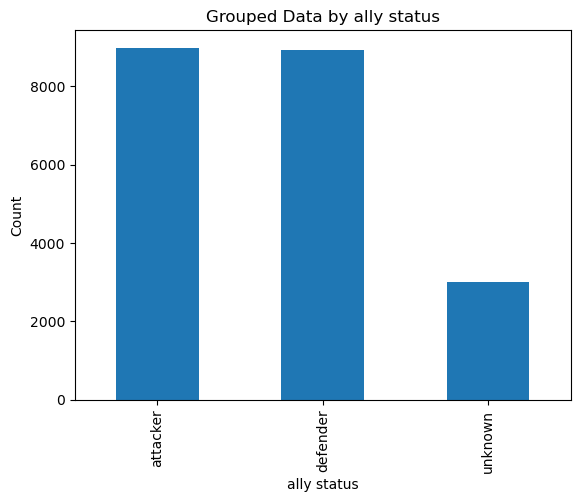

In [11]:
grouped_df = df.groupby('round_info_ally_side').size()

grouped_df.plot(kind='bar')

plt.xlabel('ally status')
plt.ylabel('Count')
plt.title('Grouped Data by ally status')

plt.show()

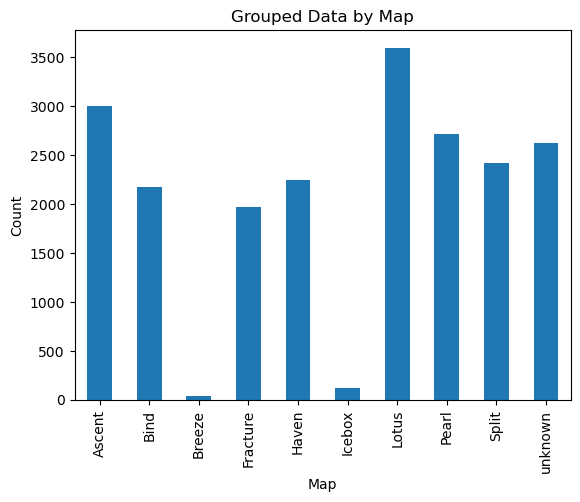

In [12]:
grouped_df = df.groupby('map').size()

grouped_df.plot(kind='bar')

plt.xlabel('Map')
plt.ylabel('Count')
plt.title('Grouped Data by Map')

plt.show()

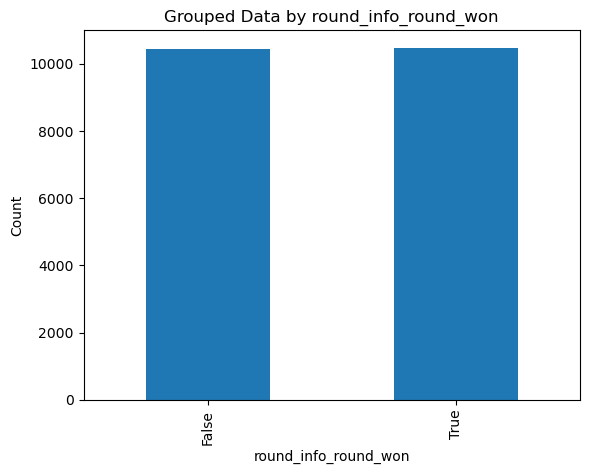

In [13]:
grouped_df = df.groupby('round_info_round_won').size()

grouped_df.plot(kind='bar')

plt.xlabel('round_info_round_won')
plt.ylabel('Count')
plt.title('Grouped Data by round_info_round_won')

plt.show()

In [14]:
mapping = {True: 1, False: 0}
df.loc[:, 'spike_planted'] = df['spike_planted'].map(mapping)
df

,user_id,map,ally3_character,ally4_character,self_character,ally1_character,ally2_character,opponent5_character,opponent6_character,opponent7_character,...,pre_spike_information_used,post_spike_information_used,pre_spike_healing_used,post_spike_healing_used,pre_spike_damage_for_team_used,post_spike_damage_for_team_used,pre_spike_crowd_control_mobility_used,post_spike_crowd_control_mobility_used,pre_spike_crowd_control_vision_used,post_spike_crowd_control_vision_used
0,3807,Pearl,gekko,viper,phoenix,astra,jett,harbor,killjoy,jett,...,0,0,0,0,0,0,0,0,4,0
1,3807,Pearl,gekko,viper,phoenix,astra,jett,harbor,killjoy,jett,...,0,0,0,0,0,0,0,0,2,0
2,3807,Pearl,gekko,viper,phoenix,astra,jett,harbor,killjoy,jett,...,0,0,0,0,0,0,0,0,0,0
3,3807,Pearl,gekko,viper,phoenix,astra,jett,harbor,killjoy,jett,...,0,0,0,0,1,0,0,0,0,2
4,3807,Pearl,gekko,viper,phoenix,astra,jett,harbor,killjoy,jett,...,0,0,1,0,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20909,61,Icebox,viper,harbor,cypher,reyna,sage,sage,astra,reyna,...,1,1,0,0,0,0,1,0,1,1
20910,61,Icebox,viper,harbor,cypher,reyna,sage,sage,astra,reyna,...,2,0,0,0,0,0,1,0,2,0
20911,61,Icebox,viper,harbor,cypher,reyna,sage,sage,astra,reyna,...,1,1,0,0,0,0,2,0,1,1
20912,61,Icebox,viper,harbor,cypher,reyna,sage,sage,astra,reyna,...,2,0,0,0,0,0,1,0,2,0


In [15]:
mapping = {True: 1, False: 0}
df.loc[:, 'round_info_round_won'] = df['round_info_round_won'].map(mapping)
df

,user_id,map,ally3_character,ally4_character,self_character,ally1_character,ally2_character,opponent5_character,opponent6_character,opponent7_character,...,pre_spike_information_used,post_spike_information_used,pre_spike_healing_used,post_spike_healing_used,pre_spike_damage_for_team_used,post_spike_damage_for_team_used,pre_spike_crowd_control_mobility_used,post_spike_crowd_control_mobility_used,pre_spike_crowd_control_vision_used,post_spike_crowd_control_vision_used
0,3807,Pearl,gekko,viper,phoenix,astra,jett,harbor,killjoy,jett,...,0,0,0,0,0,0,0,0,4,0
1,3807,Pearl,gekko,viper,phoenix,astra,jett,harbor,killjoy,jett,...,0,0,0,0,0,0,0,0,2,0
2,3807,Pearl,gekko,viper,phoenix,astra,jett,harbor,killjoy,jett,...,0,0,0,0,0,0,0,0,0,0
3,3807,Pearl,gekko,viper,phoenix,astra,jett,harbor,killjoy,jett,...,0,0,0,0,1,0,0,0,0,2
4,3807,Pearl,gekko,viper,phoenix,astra,jett,harbor,killjoy,jett,...,0,0,1,0,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20909,61,Icebox,viper,harbor,cypher,reyna,sage,sage,astra,reyna,...,1,1,0,0,0,0,1,0,1,1
20910,61,Icebox,viper,harbor,cypher,reyna,sage,sage,astra,reyna,...,2,0,0,0,0,0,1,0,2,0
20911,61,Icebox,viper,harbor,cypher,reyna,sage,sage,astra,reyna,...,1,1,0,0,0,0,2,0,1,1
20912,61,Icebox,viper,harbor,cypher,reyna,sage,sage,astra,reyna,...,2,0,0,0,0,0,1,0,2,0


In [16]:
# Find rows with NaN values
nan_rows = df[df.isnull().any(axis=1)]

# Print the rows with NaN values
nan_rows

,user_id,map,ally3_character,ally4_character,self_character,ally1_character,ally2_character,opponent5_character,opponent6_character,opponent7_character,...,pre_spike_information_used,post_spike_information_used,pre_spike_healing_used,post_spike_healing_used,pre_spike_damage_for_team_used,post_spike_damage_for_team_used,pre_spike_crowd_control_mobility_used,post_spike_crowd_control_mobility_used,pre_spike_crowd_control_vision_used,post_spike_crowd_control_vision_used


### one-hot encoding 

In [17]:
df_encoded = pd.get_dummies(df, columns=['map', 'ally4_character', 
                                        'ally1_character', 'ally2_character', 'ally3_character', 
                                        'opponent5_character', 'opponent6_character', 'opponent7_character',
                                        'opponent8_character', 'opponent9_character',
                                        'round_info_ally_side','self_longest_inv_state', 
                                        'self_longest_gun_primary','self_longest_gun_secondary',
                                         'self_post_spike_longest_inv_state','self_pre_spike_longest_inv_state',
                                         'self_post_spike_longest_gun_secondary','self_pre_spike_longest_gun_secondary'
                                        ,'self_post_spike_longest_gun_primary','self_pre_spike_longest_gun_primary'])


In [18]:
df_encoded

,user_id,self_character,spike_planted,spike_time,round_info_round_end,round_info_round_won,round_info_round_start,ally3_pre_spike_elims,ally3_post_spike_elims,ally3_pre_spike_deaths,...,self_pre_spike_longest_gun_primary_guardian,self_pre_spike_longest_gun_primary_judge,self_pre_spike_longest_gun_primary_marshal,self_pre_spike_longest_gun_primary_none,self_pre_spike_longest_gun_primary_odin,self_pre_spike_longest_gun_primary_operator,self_pre_spike_longest_gun_primary_phantom,self_pre_spike_longest_gun_primary_spectre,self_pre_spike_longest_gun_primary_stinger,self_pre_spike_longest_gun_primary_vandal
0,3807,phoenix,0,0,178579,0,134795,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,3807,phoenix,1,257180,287772,0,208579,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3807,phoenix,0,0,377967,1,317772,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3807,phoenix,1,471764,487358,0,407967,0,2,0,...,0,0,0,0,0,0,0,0,0,1
4,3807,phoenix,1,540359,580547,0,517358,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20909,61,cypher,1,1816200,1829396,1,1779806,0,1,0,...,0,0,0,1,0,0,0,0,0,0
20910,61,cypher,1,1945000,1971394,1,1859396,0,0,1,...,0,0,0,0,0,0,0,0,0,1
20911,61,cypher,1,2040200,2083414,0,2001394,1,0,1,...,0,0,0,1,0,0,0,0,0,0
20912,61,cypher,1,2148800,2178399,0,2113414,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## round length

In [19]:
df_encoded['round_info_round_length'] = df_encoded['round_info_round_end'] - df_encoded['round_info_round_start']
